In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow
from tensorflow.contrib.keras import models, layers
from tensorflow.contrib.keras import activations, optimizers, losses
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow.compat.v1 as tf

In [0]:
from google.colab import files
uploaded = files.upload()

In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!pwd
os.chdir('gdrive/Shared drives/ISE 364 Project')
!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/Shared drives/ISE 364 Project
'data (1).csv'		     'ISE 364 Project.ipynb'
 data.csv		     'ISE 364 Report.gdoc'
 data_pre_temp3.csv	      myTreeName.dot
 data_pre_temp3.gsheet	      Project5.ipynb
 df_replace.csv		      Project.pdf
 df_replace_prediction1.csv   spark-2.4.4-bin-hadoop2.7
 df_replace_prediction.csv    spark-2.4.4-bin-hadoop2.7.tgz
 df_upsampled.csv	      spark-2.4.4-bin-hadoop2.7.tgz.1
'futures (1).csv'	      spark-2.4

In [0]:
missing_values = ["?"]

In [0]:
df = pd.read_csv('/content/gdrive/Shared drives/ISE 364 Project/data.csv',header = None,na_values = missing_values)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     30725 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     30718 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    31978 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
print (df.isnull().sum())

0        0
1     1836
2        0
3        0
4        0
5        0
6     1843
7        0
8        0
9        0
10       0
11       0
12       0
13     583
14       0
dtype: int64


In [0]:
df_prediction=pd.read_csv('/content/gdrive/Shared drives/ISE 364 Project/futures.csv',header = None,na_values = missing_values)

In [9]:
df_prediction.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,38,A0,89814,B1,9,C1,D1,E1,F1,G0,0,0,50,H0
1,28,A1,336951,B2,12,C1,D2,E1,F1,G0,0,0,40,H0
2,44,A0,160323,B3,10,C1,D0,E1,F0,G0,7688,0,40,H0
3,18,NaN,103497,B3,10,C0,NaN,E0,F1,G1,0,0,30,H0
4,63,A3,104626,B5,15,C1,D5,E1,F1,G0,3103,0,32,H0


In [0]:
df_replace = df.copy()

In [0]:
df_replace_prediction = df_prediction.copy()

# 1 Data Preparation

### 1.1 Data Visualization

### 1.1.1 Visualizing the Target Column 

In [0]:
# converting the integer column name to string
df.columns = df.columns.map(str)
df_replace.columns = df_replace.columns.map(str)

In [0]:
df_replace['14'].value_counts()

SMALL    24720
LARGE     7841
Name: 14, dtype: int64

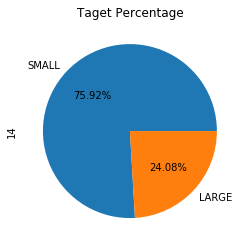

In [0]:
# The percentage of "SMALL"/"2" in our dataset is 75.11% while the percentage of "LARGE"/"2" is only 24.89%.
# Therefore, imbalanced issue may be considered later in our models
df_replace['14'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%',title ="Taget Percentage")

## 1.2.2 Visualizing the categorical Column

In [0]:
import seaborn as sns
df_replace.dropna(inplace=True)
df_replace_prediction.dropna(inplace=True)

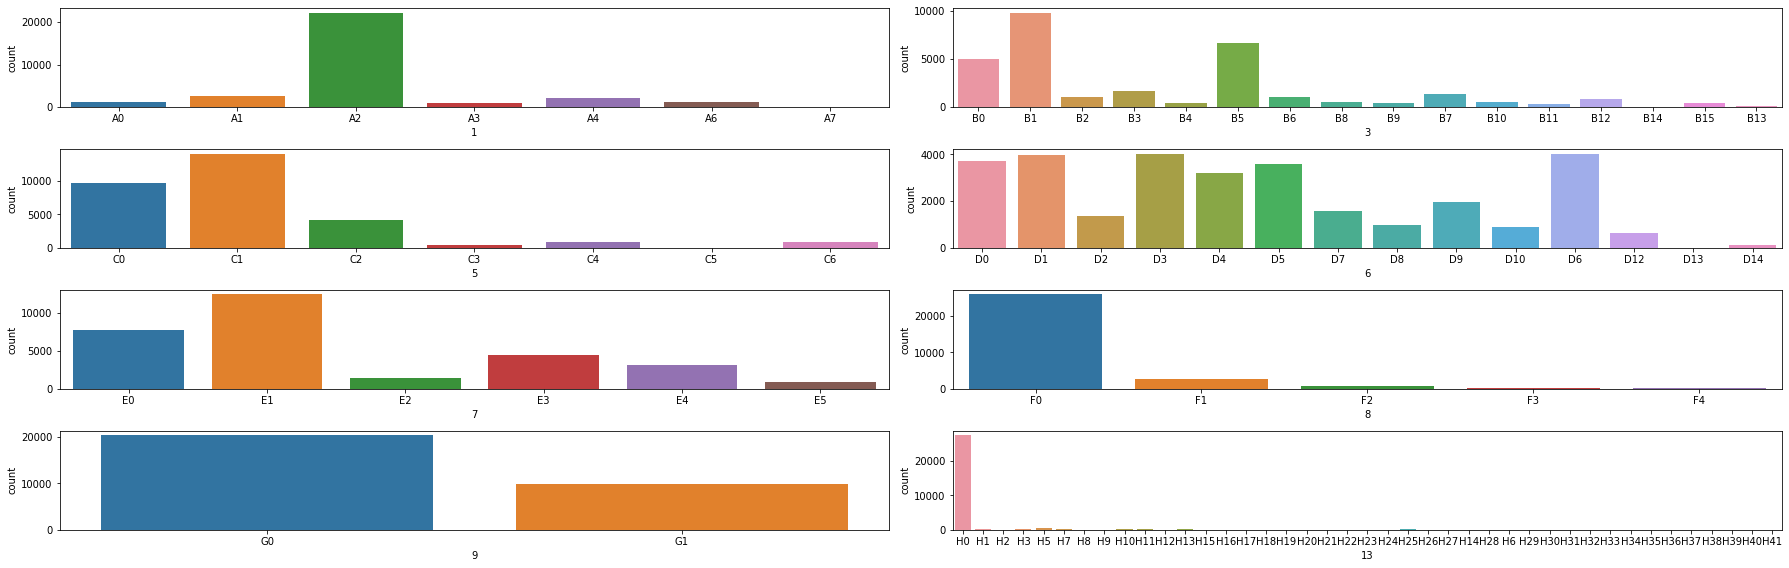

In [0]:
fig, ax =plt.subplots(4,2,figsize=[25,8])
ax = ax.flatten()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
sns.countplot(df_replace["1"], ax=ax[0])
sns.countplot(df_replace["3"], ax=ax[1])
sns.countplot(df_replace["5"],ax=ax[2])
sns.countplot(df_replace["6"],ax=ax[3])
sns.countplot(df_replace["7"],ax=ax[4])
sns.countplot(df_replace["8"],ax=ax[5])
sns.countplot(df_replace["9"],ax=ax[6])
sns.countplot(df_replace["13"],ax=ax[7])
plt.tight_layout()
fig.show()

## 1.3 Preparing the Features for Machine Learning

### 1.3.1 Drop Missing Values

In [0]:
df_replace=df_replace.dropna()

### 1.3.2 Transform Categorical value to Numerical value

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
df_replace_le = ohe.fit_transform(df_replace)

In [0]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [15]:
le = MultiColumnLabelEncoder()
df_replace_le = le.fit_transform(df_replace)
df_replace_le.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,22,0,2491,0,12,0,0,0,0,0,24,0,39,0,1
1,33,1,2727,0,12,1,1,1,0,0,0,0,12,0,1
2,21,2,13188,1,8,2,6,0,0,0,0,0,39,0,1
3,36,2,14354,8,6,1,6,1,1,0,0,0,39,0,1
4,11,2,18120,0,12,1,7,2,1,1,0,0,39,1,1
5,20,2,16567,9,13,1,1,2,0,1,0,0,39,0,1
6,32,2,7982,10,4,3,8,0,1,1,0,0,15,12,1
7,35,1,12746,1,8,1,1,1,0,0,0,0,44,0,0
8,14,2,1225,9,13,0,7,0,0,1,104,0,49,0,0
9,25,2,7908,0,12,1,1,1,0,0,78,0,39,0,0


In [16]:
df_replace_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
0     30162 non-null int64
1     30162 non-null int64
2     30162 non-null int64
3     30162 non-null int64
4     30162 non-null int64
5     30162 non-null int64
6     30162 non-null int64
7     30162 non-null int64
8     30162 non-null int64
9     30162 non-null int64
10    30162 non-null int64
11    30162 non-null int64
12    30162 non-null int64
13    30162 non-null int64
14    30162 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [25]:
le = MultiColumnLabelEncoder()
df_replace_le = le.fit_transform(df_replace)
df_replace_le.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,22,0,2491,0,12,0,0,0,0,0,24,0,39,0,1
1,33,1,2727,0,12,1,1,1,0,0,0,0,12,0,1
2,21,2,13188,1,8,2,6,0,0,0,0,0,39,0,1
3,36,2,14354,8,6,1,6,1,1,0,0,0,39,0,1
4,11,2,18120,0,12,1,7,2,1,1,0,0,39,1,1


In [26]:
selected_columns = ["0","2","4","10","11","12"]
data2 = pd.DataFrame(data = df_replace_le, columns = selected_columns)
data2.corr()

,0,2,4,10,11,12
0,1.000000,-0.078136,0.043544,0.127099,0.066324,0.102539
2,-0.078136,1.000000,-0.043944,-0.005102,-0.009561,-0.024572
4,0.043544,-0.043944,1.000000,0.154461,0.083858,0.154684
10,0.127099,-0.005102,0.154461,1.000000,-0.058161,0.102407
11,0.066324,-0.009561,0.083858,-0.058161,1.000000,0.057450
12,0.102539,-0.024572,0.154684,0.102407,0.057450,1.000000


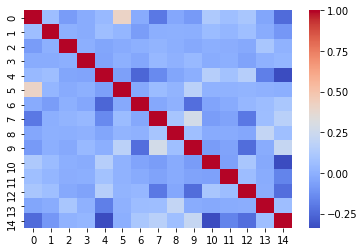

In [19]:
sb.heatmap(df_replace_le.corr(), cmap='coolwarm')

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
df_prediction_le = ohe.fit_transform(df_replace)

In [0]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [29]:
le = MultiColumnLabelEncoder()
df_prediction_le = le.fit_transform(df_replace)
df_prediction_le.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,22,0,2491,0,12,0,0,0,0,0,24,0,39,0,1
1,33,1,2727,0,12,1,1,1,0,0,0,0,12,0,1
2,21,2,13188,1,8,2,6,0,0,0,0,0,39,0,1
3,36,2,14354,8,6,1,6,1,1,0,0,0,39,0,1
4,11,2,18120,0,12,1,7,2,1,1,0,0,39,1,1


# 2 Modelling

## 2.1 Logistic Regression

### 2.1.1 Modeling

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression(solver='liblinear')

In [0]:
X = df_replace_le.drop('14',axis=1)
y = df_replace_le['14']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [35]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

### 2.1.2 Evaluation

In [37]:
confusion_matrix(y_test, predictions)

array([[1234, 1803],
       [ 574, 8454]])

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      3037
           1       0.82      0.94      0.88      9028

    accuracy                           0.80     12065
   macro avg       0.75      0.67      0.69     12065
weighted avg       0.79      0.80      0.78     12065



## 2.2 Decision Tree 

### 2.2.1 Original Decision Tree

In [0]:
# converting the integer column name to string
df.columns = df.columns.map(str)
df_replace.columns = df_replace.columns.map(str)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df_replace_le =df_replace_le.dropna()
X = df_replace_le.drop('14',axis=1)
y = df_replace_le['14']

In [0]:
df_replace_le.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Cluster
0,22,0,2491,0,12,0,0,0,0,0,24,0,39,0,1,1
1,33,1,2727,0,12,1,1,1,0,0,0,0,12,0,1,1
2,21,2,13188,1,8,2,6,0,0,0,0,0,39,0,1,1
3,36,2,14354,8,6,1,6,1,1,0,0,0,39,0,1,1
4,11,2,18120,0,12,1,7,2,1,1,0,0,39,1,1,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print("The Accurancy of Decision tree is {}.".format(accuracy_score(y_test,predictions)))

The Accurancy of Decision tree is 0.8037352193612554.


In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      2306
           1       0.87      0.87      0.87      6743

    accuracy                           0.80      9049
   macro avg       0.74      0.74      0.74      9049
weighted avg       0.80      0.80      0.80      9049



In [0]:
### deal with imbalanced labels
y.value_counts()

1    22654
0     7508
Name: 14, dtype: int64

### 2.2.2 Decision Tree- Upsampling

In [0]:
from sklearn.utils import resample
# First, we'll separate observations from each class into different DataFrames.
# Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
# Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame. 

 # https://elitedatascience.com/imbalanced-classes

In [0]:
df_majority = df_replace_le[df_replace_le["14"]==1]
df_minority = df_replace_le[df_replace_le["14"]==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=22654,  # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled["14"].value_counts()

1    22654
0    22654
Name: 14, dtype: int64

In [0]:
df_upsampled.to_csv("df_upsampled.csv")

In [0]:
X_up = df_upsampled.drop('14',axis=1)
y_up = df_upsampled['14']
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.30, random_state=101)
dtree_up = DecisionTreeClassifier(criterion='entropy')
dtree_up.fit(X_train,y_train)
predictions_up = dtree_up.predict(X_test)
print("The Accurancy of Decision tree is {}.".format(accuracy_score(y_test,predictions_up)))
print(classification_report(y_test,predictions_up))

The Accurancy of Decision tree is 0.899433531964982.
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6739
           1       0.95      0.85      0.89      6854

    accuracy                           0.90     13593
   macro avg       0.90      0.90      0.90     13593
weighted avg       0.90      0.90      0.90     13593



In [0]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz

# Creates dot file named tree.dot
export_graphviz(
            dtree_up,
            out_file =  "myTreeName.dot",
            feature_names = list(X_up.columns),
            class_names = "14",
            filled = True,
            rounded = True)

### 2.2.3 Decision tree with categorical variables

In [0]:
# from the myTreeName.dot, we can see that the sklearn decision tree treat the categorical data as numeric data.
# cannot find pandas decision tree to specify the categorical columns, therefore,we use spark decision tree classfier to deal with it.

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
os.environ["JAVA_HOME"] ="/usr/lib/jvm/java-8-openjdk-amd64"

import findspark
findspark.init("spark-2.4.4-bin-hadoop2.7") # SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
dataDC = spark.read.csv("/content/gdrive/Shared drives/ISE 364 Project/df_upsampled.csv",inferSchema= True,header=True)

In [0]:
dataDC.show(5)

+---+---+---+-----+---+---+---+---+---+---+---+---+---+---+---+---+
|_c0|  0|  1|    2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14|
+---+---+---+-----+---+---+---+---+---+---+---+---+---+---+---+---+
|  0| 22|  0| 2491|  0| 12|  0|  0|  0|  0|  0| 24|  0| 39|  0|  1|
|  1| 33|  1| 2727|  0| 12|  1|  1|  1|  0|  0|  0|  0| 12|  0|  1|
|  2| 21|  2|13188|  1|  8|  2|  6|  0|  0|  0|  0|  0| 39|  0|  1|
|  3| 36|  2|14354|  8|  6|  1|  6|  1|  1|  0|  0|  0| 39|  0|  1|
|  4| 11|  2|18120|  0| 12|  1|  7|  2|  1|  1|  0|  0| 39|  1|  1|
+---+---+---+-----+---+---+---+---+---+---+---+---+---+---+---+---+
only showing top 5 rows



In [0]:
dataRDD = dataDC.rdd
dataRDD.take(2)

[Row(_c0=0, 0=22, 1=0, 2=2491, 3=0, 4=12, 5=0, 6=0, 7=0, 8=0, 9=0, 10=24, 11=0, 12=39, 13=0, 14=1),
 Row(_c0=1, 0=33, 1=1, 2=2727, 3=0, 4=12, 5=1, 6=1, 7=1, 8=0, 9=0, 10=0, 11=0, 12=12, 13=0, 14=1)]

In [0]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
def mapToNum(x):
    label = float(x[14])
    features = [float(x[1]),float(x[2]),float(x[3]),float(x[4]),float(x[5]),float(x[6]),float(x[7]),float(x[8]),float(x[9]),float(x[10]),float(x[11]),float(x[12]),float(x[13]),float(x[14])]
    return LabeledPoint(label,features)
dataRDD1 = dataRDD.map(mapToNum)

dataRDD1.take(2)

[LabeledPoint(0.0, [22.0,0.0,2491.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,39.0,0.0]),
 LabeledPoint(0.0, [33.0,1.0,2727.0,0.0,12.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0])]

In [0]:
# this will split randomly the data 60% for training and 40% for testing
trainingData, testData = dataRDD1.randomSplit( [0.6, 0.4])

In [0]:
# Error: GiniAggregator given label 36.0 but requires label < numClasses (= 2).
trainingData = trainingData.filter(lambda lp: (lp.label==0.0 ) or (lp.label==1.0))
trainingData.take(10)

[LabeledPoint(0.0, [15.0,2.0,12364.0,12.0,11.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,49.0,0.0]),
 LabeledPoint(0.0, [8.0,1.0,9507.0,1.0,8.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,34.0,0.0]),
 LabeledPoint(0.0, [37.0,2.0,17134.0,1.0,8.0,4.0,8.0,4.0,1.0,1.0,0.0,0.0,19.0,0.0]),
 LabeledPoint(0.0, [42.0,2.0,4309.0,1.0,8.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,39.0,0.0]),
 LabeledPoint(0.0, [32.0,2.0,11265.0,1.0,8.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0,39.0,0.0]),
 LabeledPoint(0.0, [6.0,4.0,10970.0,12.0,11.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0]),
 LabeledPoint(0.0, [3.0,2.0,15818.0,11.0,9.0,0.0,9.0,3.0,1.0,0.0,0.0,0.0,43.0,0.0]),
 LabeledPoint(0.0, [28.0,2.0,19113.0,0.0,12.0,2.0,1.0,3.0,0.0,0.0,0.0,15.0,39.0,0.0]),
 LabeledPoint(0.0, [5.0,0.0,17406.0,11.0,9.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,14.0,0.0]),
 LabeledPoint(0.0, [2.0,2.0,20060.0,1.0,8.0,5.0,0.0,2.0,0.0,1.0,0.0,0.0,24.0,0.0])]

In [0]:
import sys
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel

# Train a DecisionTree model.
#  Empty categoricalFeaturesInfo indicates all features are continuous.

# Evaluate model on test instances and compute test error
model = DecisionTree.trainClassifier(trainingData, numClasses=2, 
                                     #using categoricalFeaturesInfo we can specify the categorical columns
                                     categoricalFeaturesInfo={1:7,3:16,5:7,6:14,7:6,8:5,9:2,13:41},
                                     impurity='gini', maxDepth=5, maxBins=50)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testErr = labelsAndPredictions.filter(lambda lp: lp[0] != lp[1]).count() / float(testData.count())
print('Test Error = ' + str(testErr))
print('Learned classification tree model:')
print(model.toDebugString())

Test Error = 0.10102441150828248
Learned classification tree model:
DecisionTreeModel classifier of depth 1 with 3 nodes
  If (feature 13 in {0.0})
   Predict: 0.0
  Else (feature 13 not in {0.0})
   Predict: 1.0



### 2.2.4 Decision tree with categorical variables and normalized numeric columns

In [0]:
# we found the data in column 2 and column 10 are much higher than the data in other numeric columns
#Therefore, we try to normalize the numeric columns

In [0]:
from pyspark.ml.feature import *
from pyspark.ml.pipeline import *
from pyspark.sql.functions import min, max, col

In [0]:
from pyspark.sql.functions import stddev, mean, col

In [0]:
numeric = ["0","2","4","10","11","12"]
mean_0, sttdev_0 = dataDC.select(mean("0"), stddev("0")).first()
dataDC = dataDC.withColumn("0_scaled", (col("0") - mean_0) / sttdev_0)
mean_2, sttdev_2 = dataDC.select(mean("2"), stddev("2")).first()
dataDC = dataDC.withColumn("2_scaled", (col("2") - mean_2) / sttdev_2)
mean_4, sttdev_4 = dataDC.select(mean("4"), stddev("4")).first()
dataDC = dataDC.withColumn("4_scaled", (col("4") - mean_4) / sttdev_4)
mean_11, sttdev_11 = dataDC.select(mean("11"), stddev("11")).first()
dataDC = dataDC.withColumn("11_scaled", (col("11") - mean_11) / sttdev_11)
mean_10, sttdev_10 = dataDC.select(mean("10"), stddev("10")).first()
dataDC = dataDC.withColumn("10_scaled", (col("10") - mean_10) / sttdev_10)
mean_12, sttdev_12 = dataDC.select(mean("12"), stddev("12")).first()
dataDC = dataDC.withColumn("12_scaled", (col("12") - mean_12) / sttdev_12)

In [0]:
dataDC=dataDC.dropna()

In [0]:
dataDC_scaled = dataDC.select(dataDC["0_scaled"],dataDC["1"],dataDC["2_scaled"],dataDC["3"],dataDC["4_scaled"],dataDC["5"],\
                              dataDC["6"], dataDC["7"],dataDC["8"],dataDC["9"],dataDC["10_scaled"],dataDC["11_scaled"],dataDC["12_scaled"],dataDC["13"],dataDC["14"])
dataDC_scaled.show()

+--------------------+---+--------------------+---+-------------------+---+---+---+---+---+--------------------+--------------------+--------------------+---+---+
|            0_scaled|  1|            2_scaled|  3|           4_scaled|  5|  6|  7|  8|  9|           10_scaled|           11_scaled|           12_scaled| 13| 14|
+--------------------+---+--------------------+---+-------------------+---+---+---+---+---+--------------------+--------------------+--------------------+---+---+
|-0.10155674838931615|  0| -1.2964496340677232|  0|  0.919767250008194|  0|  0|  0|  0|  0| 0.42181825842840875|-0.25043010922185727|-0.20784509235898896|  0|  1|
|  0.7757839930825681|  1| -1.2545254025341188|  0|  0.919767250008194|  1|  1|  1|  0|  0|-0.36501450624656895|-0.25043010922185727| -2.5534407805501074|  0|  1|
| -0.1813149976140329|  2|  0.6038194537075593|  1| -0.624299390599878|  2|  6|  0|  0|  0|-0.36501450624656895|-0.25043010922185727|-0.20784509235898896|  0|  1|
|  1.0150587407567184|

In [0]:
dataDC_scaled.agg(max("1")).show()

+------+
|max(1)|
+------+
|     6|
+------+



In [0]:
dataRDD_scaled = dataDC_scaled.rdd
dataRDD_scaled.take(2)

[Row(0_scaled=-0.10155674838931615, 1=0, 2_scaled=-1.2964496340677232, 3=0, 4_scaled=0.919767250008194, 5=0, 6=0, 7=0, 8=0, 9=0, 10_scaled=0.42181825842840875, 11_scaled=-0.25043010922185727, 12_scaled=-0.20784509235898896, 13=0, 14=1),
 Row(0_scaled=0.7757839930825681, 1=1, 2_scaled=-1.2545254025341188, 3=0, 4_scaled=0.919767250008194, 5=1, 6=1, 7=1, 8=0, 9=0, 10_scaled=-0.36501450624656895, 11_scaled=-0.25043010922185727, 12_scaled=-2.5534407805501074, 13=0, 14=1)]

In [0]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
def mapToNum(x):
    label = float(x[14])
    features = [float(x[0]),float(x[1]),float(x[2]),float(x[3]),float(x[4]),float(x[5]),float(x[6]),float(x[7]),float(x[8]),float(x[9]),float(x[10]),float(x[11]),float(x[12]),float(x[13])]
    return LabeledPoint(label,features)
dataRDD_scaled1 = dataRDD_scaled.map(mapToNum)

dataRDD_scaled1.take(2)

[LabeledPoint(1.0, [-0.10155674838931615,0.0,-1.2964496340677232,0.0,0.919767250008194,0.0,0.0,0.0,0.0,0.0,0.42181825842840875,-0.25043010922185727,-0.20784509235898896,0.0]),
 LabeledPoint(1.0, [0.7757839930825681,1.0,-1.2545254025341188,0.0,0.919767250008194,1.0,1.0,1.0,0.0,0.0,-0.36501450624656895,-0.25043010922185727,-2.5534407805501074,0.0])]

In [0]:
# this will split randomly the data 60% for training and 40% for testing
trainingData_scaled, testData_scaled = dataRDD_scaled1.randomSplit( [0.6, 0.4])

In [0]:
# Train a DecisionTree model.
#  Empty categoricalFeaturesInfo indicates all features are continuous.

# Evaluate model on test instances and compute test error
model = DecisionTree.trainClassifier(trainingData_scaled, numClasses=2, 
                                     #using categoricalFeaturesInfo we can specify the categorical columns
                                     categoricalFeaturesInfo={1:7,3:17,5:8,6:15,7:7,8:6,9:3,13:42},
                                     impurity='gini', maxDepth=5, maxBins=50)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData_scaled.map(lambda x: x.features))
labelsAndPredictions = testData_scaled.map(lambda lp: lp.label).zip(predictions)
testErr = labelsAndPredictions.filter(lambda lp: lp[0] != lp[1]).count() / float(testData_scaled.count())
print('Test Error = ' + str(testErr))
print('Learned classification tree model:')
print(model.toDebugString())

Test Error = 0.20611147684880404
Learned classification tree model:
DecisionTreeModel classifier of depth 5 with 35 nodes
  If (feature 5 in {5.0,1.0,6.0,2.0,3.0,4.0})
   If (feature 5 in {5.0,6.0,2.0,3.0,4.0})
    If (feature 10 <= 2.5692160120205356)
     If (feature 4 <= 0.7267589199321851)
      Predict: 1.0
     Else (feature 4 > 0.7267589199321851)
      If (feature 12 <= 0.1830875223395308)
       Predict: 1.0
      Else (feature 12 > 0.1830875223395308)
       Predict: 0.0
    Else (feature 10 > 2.5692160120205356)
     If (feature 10 <= 2.733139504661156)
      If (feature 3 in {0.0,2.0,8.0,9.0})
       Predict: 0.0
      Else (feature 3 not in {0.0,2.0,8.0,9.0})
       Predict: 1.0
     Else (feature 10 > 2.733139504661156)
      Predict: 0.0
   Else (feature 5 not in {5.0,6.0,2.0,3.0,4.0})
    If (feature 4 <= 0.7267589199321851)
     If (feature 10 <= 2.0118761370424263)
      If (feature 4 <= -0.817307720675887)
       Predict: 1.0
      Else (feature 4 > -0.81730772067588

In [0]:
# As the accuracy of normalized model is not improved, 
# therefore, we decided to use the decision tree with categorical model to predict the future.

### 2.2.5 Prediction

In [0]:
data_pre = spark.read.csv("/content/gdrive/Shared drives/ISE 364 Project/df_replace_prediction1.csv",inferSchema= True,header=True)

In [0]:
data_pre.show()

+---+---+---+------+---+---+---+---+---+---+---+-----+---+---+---+
|_c0|  0|  1|     2|  3|  4|  5|  6|  7|  8|  9|   10| 11| 12| 13|
+---+---+---+------+---+---+---+---+---+---+---+-----+---+---+---+
|  0| 38|  0| 89814|  1|  9|  1|  1|  1|  1|  0|    0|  0| 50|  0|
|  1| 28|  1|336951|  8| 12|  1|  6|  1|  1|  0|    0|  0| 40|  0|
|  2| 44|  0|160323|  9| 10|  1|  0|  1|  0|  0| 7688|  0| 40|  0|
|  4| 63|  3|104626| 11| 15|  1|  9|  1|  1|  0| 3103|  0| 32|  0|
|  5| 65|  0|184454|  1|  9|  1|  0|  1|  1|  0| 6418|  0| 40|  0|
|  6| 48|  0|279724|  1|  9|  1|  0|  1|  1|  0| 3103|  0| 48|  0|
|  7| 43|  0|346189| 14| 14|  1| 12|  1|  1|  0|    0|  0| 50|  0|
|  9| 34|  0|107914| 13| 13|  1| 13|  1|  1|  0|    0|  0| 47|  0|
| 10| 34|  0|238588|  9| 10|  0|  8|  0|  0|  1|    0|  0| 35|  0|
| 11| 45|  3|432824|  1|  9|  1| 10|  1|  1|  0| 7298|  0| 90|  0|
| 12| 22|  0|236427|  1|  9|  0| 11|  0|  1|  0|    0|  0| 20|  0|
| 13| 46| A5|106444|  9| 10|  1| 12|  1|  0|  0| 7688|  0| 38|

In [0]:
data_pre = data_pre.dropna()
data_pre.show()

+---+---+---+------+---+---+---+---+---+---+---+-----+---+---+---+
|_c0|  0|  1|     2|  3|  4|  5|  6|  7|  8|  9|   10| 11| 12| 13|
+---+---+---+------+---+---+---+---+---+---+---+-----+---+---+---+
|  0| 38|  0| 89814|  1|  9|  1|  1|  1|  1|  0|    0|  0| 50|  0|
|  1| 28|  1|336951|  8| 12|  1|  6|  1|  1|  0|    0|  0| 40|  0|
|  2| 44|  0|160323|  9| 10|  1|  0|  1|  0|  0| 7688|  0| 40|  0|
|  4| 63|  3|104626| 11| 15|  1|  9|  1|  1|  0| 3103|  0| 32|  0|
|  5| 65|  0|184454|  1|  9|  1|  0|  1|  1|  0| 6418|  0| 40|  0|
|  6| 48|  0|279724|  1|  9|  1|  0|  1|  1|  0| 3103|  0| 48|  0|
|  7| 43|  0|346189| 14| 14|  1| 12|  1|  1|  0|    0|  0| 50|  0|
|  9| 34|  0|107914| 13| 13|  1| 13|  1|  1|  0|    0|  0| 47|  0|
| 10| 34|  0|238588|  9| 10|  0|  8|  0|  0|  1|    0|  0| 35|  0|
| 11| 45|  3|432824|  1|  9|  1| 10|  1|  1|  0| 7298|  0| 90|  0|
| 12| 22|  0|236427|  1|  9|  0| 11|  0|  1|  0|    0|  0| 20|  0|
| 13| 46| A5|106444|  9| 10|  1| 12|  1|  0|  0| 7688|  0| 38|

In [0]:
data_pre.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- 0: integer (nullable = true)
 |-- 1: string (nullable = true)
 |-- 2: integer (nullable = true)
 |-- 3: integer (nullable = true)
 |-- 4: integer (nullable = true)
 |-- 5: integer (nullable = true)
 |-- 6: string (nullable = true)
 |-- 7: integer (nullable = true)
 |-- 8: integer (nullable = true)
 |-- 9: integer (nullable = true)
 |-- 10: integer (nullable = true)
 |-- 11: integer (nullable = true)
 |-- 12: integer (nullable = true)
 |-- 13: string (nullable = true)



In [0]:
# Some unexpect errors in column 1,6,13 need to be correct. 

from pyspark.sql.functions import regexp_replace
# data_pre_temp = data_pre.("abnormal_1",regexp_extract(data_pre['1'], '[a-zA-Z]+',0))
data_pre_temp = data_pre.withColumn('1_new', regexp_replace("1",'A5', '4'))
data_pre_temp = data_pre_temp.withColumn('13_new', regexp_replace("13",'H4', '3'))
data_pre_temp = data_pre_temp.withColumn('6_new', regexp_replace("6",'D11', '10'))
data_pre_temp.show()

+---+---+---+------+---+---+---+---+---+---+---+-----+---+---+---+-----+------+-----+
|_c0|  0|  1|     2|  3|  4|  5|  6|  7|  8|  9|   10| 11| 12| 13|1_new|13_new|6_new|
+---+---+---+------+---+---+---+---+---+---+---+-----+---+---+---+-----+------+-----+
|  0| 38|  0| 89814|  1|  9|  1|  1|  1|  1|  0|    0|  0| 50|  0|    0|     0|    1|
|  1| 28|  1|336951|  8| 12|  1|  6|  1|  1|  0|    0|  0| 40|  0|    1|     0|    6|
|  2| 44|  0|160323|  9| 10|  1|  0|  1|  0|  0| 7688|  0| 40|  0|    0|     0|    0|
|  4| 63|  3|104626| 11| 15|  1|  9|  1|  1|  0| 3103|  0| 32|  0|    3|     0|    9|
|  5| 65|  0|184454|  1|  9|  1|  0|  1|  1|  0| 6418|  0| 40|  0|    0|     0|    0|
|  6| 48|  0|279724|  1|  9|  1|  0|  1|  1|  0| 3103|  0| 48|  0|    0|     0|    0|
|  7| 43|  0|346189| 14| 14|  1| 12|  1|  1|  0|    0|  0| 50|  0|    0|     0|   12|
|  9| 34|  0|107914| 13| 13|  1| 13|  1|  1|  0|    0|  0| 47|  0|    0|     0|   13|
| 10| 34|  0|238588|  9| 10|  0|  8|  0|  0|  1|    0|

In [0]:
# create a new dataframe to be prepared for predict
data_pre_temp2 = data_pre_temp.select(data_pre_temp["_c0"],data_pre_temp["0"],data_pre_temp["1_new"],
                                      data_pre_temp["2"],data_pre_temp["3"],data_pre_temp["4"],\
                                      data_pre_temp["5"],data_pre_temp["6_new"], data_pre_temp["7"],\
                                     data_pre_temp["8"],data_pre_temp["9"],data_pre_temp["10"],\
                                      data_pre_temp["11"],data_pre_temp["12"],data_pre_temp["13_new"])
data_pre_temp2.show()

+---+---+-----+------+---+---+---+-----+---+---+---+-----+---+---+------+
|_c0|  0|1_new|     2|  3|  4|  5|6_new|  7|  8|  9|   10| 11| 12|13_new|
+---+---+-----+------+---+---+---+-----+---+---+---+-----+---+---+------+
|  0| 38|    0| 89814|  1|  9|  1|    1|  1|  1|  0|    0|  0| 50|     0|
|  1| 28|    1|336951|  8| 12|  1|    6|  1|  1|  0|    0|  0| 40|     0|
|  2| 44|    0|160323|  9| 10|  1|    0|  1|  0|  0| 7688|  0| 40|     0|
|  4| 63|    3|104626| 11| 15|  1|    9|  1|  1|  0| 3103|  0| 32|     0|
|  5| 65|    0|184454|  1|  9|  1|    0|  1|  1|  0| 6418|  0| 40|     0|
|  6| 48|    0|279724|  1|  9|  1|    0|  1|  1|  0| 3103|  0| 48|     0|
|  7| 43|    0|346189| 14| 14|  1|   12|  1|  1|  0|    0|  0| 50|     0|
|  9| 34|    0|107914| 13| 13|  1|   13|  1|  1|  0|    0|  0| 47|     0|
| 10| 34|    0|238588|  9| 10|  0|    8|  0|  0|  1|    0|  0| 35|     0|
| 11| 45|    3|432824|  1|  9|  1|   10|  1|  1|  0| 7298|  0| 90|     0|
| 12| 22|    0|236427|  1|  9|  0|   1

In [0]:
# convert data type to double
from pyspark.sql.functions import col , column
data_pre_temp3 = data_pre_temp2.withColumn("1_new", col("1_new").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("6_new", col("6_new").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("13_new", col("13_new").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("0", col("0").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("2", col("2").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("3", col("3").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("4", col("4").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("5", col("5").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("7", col("7").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("8", col("8").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("9", col("9").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("10", col("10").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("11", col("11").cast("double"))
data_pre_temp3 = data_pre_temp3.withColumn("12", col("12").cast("double"))
data_pre_temp3.show(10)

+---+----+-----+--------+----+----+---+-----+---+---+---+------+---+----+------+
|_c0|   0|1_new|       2|   3|   4|  5|6_new|  7|  8|  9|    10| 11|  12|13_new|
+---+----+-----+--------+----+----+---+-----+---+---+---+------+---+----+------+
|  0|38.0|  0.0| 89814.0| 1.0| 9.0|1.0|  1.0|1.0|1.0|0.0|   0.0|0.0|50.0|   0.0|
|  1|28.0|  1.0|336951.0| 8.0|12.0|1.0|  6.0|1.0|1.0|0.0|   0.0|0.0|40.0|   0.0|
|  2|44.0|  0.0|160323.0| 9.0|10.0|1.0|  0.0|1.0|0.0|0.0|7688.0|0.0|40.0|   0.0|
|  4|63.0|  3.0|104626.0|11.0|15.0|1.0|  9.0|1.0|1.0|0.0|3103.0|0.0|32.0|   0.0|
|  5|65.0|  0.0|184454.0| 1.0| 9.0|1.0|  0.0|1.0|1.0|0.0|6418.0|0.0|40.0|   0.0|
|  6|48.0|  0.0|279724.0| 1.0| 9.0|1.0|  0.0|1.0|1.0|0.0|3103.0|0.0|48.0|   0.0|
|  7|43.0|  0.0|346189.0|14.0|14.0|1.0| 12.0|1.0|1.0|0.0|   0.0|0.0|50.0|   0.0|
|  9|34.0|  0.0|107914.0|13.0|13.0|1.0| 13.0|1.0|1.0|0.0|   0.0|0.0|47.0|   0.0|
| 10|34.0|  0.0|238588.0| 9.0|10.0|0.0|  8.0|0.0|0.0|1.0|   0.0|0.0|35.0|   0.0|
| 11|45.0|  3.0|432824.0| 1.

In [0]:
data_pre_temp3rdd = data_pre_temp3.rdd
data_pre_temp3rdd.count()

7201

In [0]:
# use the dicision tree with categorical model to predict the new dataset
predictions = model.predict(data_pre_temp3rdd.map(lambda s: s[1:]))

In [0]:
data_pred = data_pre_temp3rdd.map(lambda s: s[0])

In [0]:
# zip the new dataset with the prediction value
data_pre = data_pre_temp3rdd.zip(predictions)

In [0]:
data_preDF = data_pre.toDF()
data_preDF.show()

+--------------------+---+
|                  _1| _2|
+--------------------+---+
|[0, 38.0, 0.0, 89...|0.0|
|[1, 28.0, 1.0, 33...|0.0|
|[2, 44.0, 0.0, 16...|0.0|
|[4, 63.0, 3.0, 10...|0.0|
|[5, 65.0, 0.0, 18...|0.0|
|[6, 48.0, 0.0, 27...|0.0|
|[7, 43.0, 0.0, 34...|0.0|
|[9, 34.0, 0.0, 10...|0.0|
|[10, 34.0, 0.0, 2...|0.0|
|[11, 45.0, 3.0, 4...|0.0|
|[12, 22.0, 0.0, 2...|0.0|
|[13, 46.0, 4.0, 1...|0.0|
|[14, 23.0, 1.0, 2...|0.0|
|[16, 36.0, 1.0, 4...|0.0|
|[17, 65.0, 0.0, 1...|0.0|
|[18, 44.0, 5.0, 1...|0.0|
|[19, 36.0, 0.0, 4...|0.0|
|[20, 28.0, 0.0, 2...|0.0|
|[21, 54.0, 0.0, 1...|0.0|
|[22, 22.0, 0.0, 5...|0.0|
+--------------------+---+
only showing top 20 rows



In [0]:
# convert the vector to multiple columns in order to match the format of future dataset
data_prePD = data_preDF.toPandas()
data_prePD.head()
data_prePD[['_c0','0', '1','2', '3','4', '5','6', '7','8', '9','10','11','12','13'] ]= pd.DataFrame(data_prePD['_1'].tolist(), index=data_prePD.index)  

In [0]:
data_prePD.head()

,_1,_2,_c0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"(0, 38.0, 0.0, 89814.0, 1.0, 9.0, 1.0, 0.0, 1....",0.0,0,38.0,0.0,89814.0,1.0,9.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,50.0,0.0
1,"(1, 28.0, 1.0, 336951.0, 8.0, 12.0, 1.0, 1.0, ...",0.0,1,28.0,1.0,336951.0,8.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,40.0,0.0
2,"(418, 45.0, 0.0, 370261.0, 13.0, 13.0, 3.0, 0....",0.0,418,45.0,0.0,370261.0,13.0,13.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,40.0,0.0
3,"(4, 63.0, 3.0, 104626.0, 11.0, 15.0, 1.0, 9.0,...",0.0,4,63.0,3.0,104626.0,11.0,15.0,1.0,9.0,1.0,1.0,0.0,3103.0,0.0,32.0,0.0
4,"(5, 65.0, 0.0, 184454.0, 1.0, 9.0, 1.0, 0.0, 1...",0.0,5,65.0,0.0,184454.0,1.0,9.0,1.0,0.0,1.0,1.0,0.0,6418.0,0.0,40.0,0.0


In [0]:
future_DCprediction = data_prePD[["0","1","2","3","4","5","6","7","8","9","10","11","12","13","_2"]]
future_DCprediction = future_DCprediction.rename(columns={"_2": "14_prediction"})
future_DCprediction.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14_prediction
0,38.0,0.0,89814.0,1.0,9.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0
1,28.0,1.0,336951.0,8.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0
2,45.0,0.0,370261.0,13.0,13.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,40.0,0.0,0.0
3,63.0,3.0,104626.0,11.0,15.0,1.0,9.0,1.0,1.0,0.0,3103.0,0.0,32.0,0.0,0.0
4,65.0,0.0,184454.0,1.0,9.0,1.0,0.0,1.0,1.0,0.0,6418.0,0.0,40.0,0.0,0.0


In [0]:
future_DCprediction['14_prediction'] = future_DCprediction['14_prediction'].apply(lambda x: "LARGE" if x==0.0  else "SMALL")
future_DCprediction.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14_prediction
0,38.0,0.0,89814.0,1.0,9.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,50.0,0.0,LARGE
1,28.0,1.0,336951.0,8.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,40.0,0.0,LARGE
2,45.0,0.0,370261.0,13.0,13.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,40.0,0.0,LARGE
3,63.0,3.0,104626.0,11.0,15.0,1.0,9.0,1.0,1.0,0.0,3103.0,0.0,32.0,0.0,LARGE
4,65.0,0.0,184454.0,1.0,9.0,1.0,0.0,1.0,1.0,0.0,6418.0,0.0,40.0,0.0,LARGE


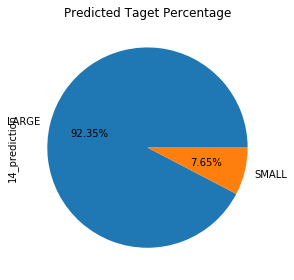

In [0]:
future_DCprediction['14_prediction'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%',title ="Predicted Taget Percentage")
plt.tight_layout()

In [0]:
future_DCprediction.to_csv("future_prediction.csv",index=False)

###############################################################################################

##2.3 K Nearest Neighbors 

### 2.3.1 Transfer the categorical data using OneHotEncoder

In [0]:
# As knn natually deal with the numeric data, we first use the oneHotEncoding to transfer the categorical data into numeric data.

In [0]:
df_replace.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [0]:
df_replace['14'] = df_replace['14'].apply(lambda x: 0 if x=="LARGE"  else 1)
df_replace.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,1
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,1
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,1
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,1
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,1


In [0]:
df_replaceNew = df_replace[["1","3","5","6","7","8","9","13"]]

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
df_replaceNew_2 = df_replaceNew.apply(le.fit_transform)
df_replaceNew_2.head()

,1,3,5,6,7,8,9,13
0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0
2,2,1,2,6,0,0,0,0
3,2,8,1,6,1,1,0,0
4,2,0,1,7,2,1,1,1


In [0]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder(categories='auto')

# 2. FIT
enc.fit(df_replaceNew_2)

# 3. Transform
onehotlabels = enc.transform(df_replaceNew_2).toarray()
onehotlabels.shape

# the same number of rows 
# but now you've so many more columns due to how we changed all the categorical data into numerical data


(30162, 98)

In [0]:
type(onehotlabels)

numpy.ndarray

In [0]:
# add the new onehotlabels to existing dataframe

import numpy as np
import pandas as pd
import scipy.sparse as sparse

df_replace['oneHotEncoder_data'] = onehotlabels.tolist()
df_replace.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,oneHotEncoder_data
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


### 2.3.2 Normalize the numeric data

In [0]:
# Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_replaceNew2 = df_replace[["0","2","4","10","11","12",'14']]
scaler.fit(df_replaceNew2.drop('14',axis=1))
scaled_features = scaler.transform(df_replaceNew2.drop('14',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df_replaceNew2.columns[:-1])
df_feat.head()

,0,2,4,10,11,12
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734


In [0]:
df_feat['oneHotEncoder_data'] = onehotlabels.tolist()

In [0]:
df_feat.head()

,0,2,4,10,11,12,oneHotEncoder_data
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


In [0]:
# create an array for classification
features_array = df_feat[["0", "2", "4","10","11","12"]].to_numpy()
features_array

array([[ 0.04279571, -1.0627216 ,  1.12891838,  0.14609228, -0.21858598,
        -0.07773411],
       [ 0.88028814, -1.00787131,  1.12891838, -0.14744462, -0.21858598,
        -2.3315307 ],
       [-0.03333996,  0.24469349, -0.4397382 , -0.14744462, -0.21858598,
        -0.07773411],
       ...,
       [ 1.48937355, -0.3585745 , -0.4397382 , -0.14744462, -0.21858598,
        -0.07773411],
       [-1.25151078,  0.11070545, -0.4397382 , -0.14744462, -0.21858598,
        -1.74721307],
       [ 1.0325595 ,  0.92884082, -0.4397382 ,  1.88111954, -0.21858598,
        -0.07773411]])

In [0]:
features_array_pre = np.concatenate((features_array, onehotlabels),axis=1)

### 2.3.3 KNN modelling

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features_array_pre,df_replace['14'],
                                                    test_size=0.30, random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1373  933]
 [ 936 5807]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      2306
           1       0.86      0.86      0.86      6743

    accuracy                           0.79      9049
   macro avg       0.73      0.73      0.73      9049
weighted avg       0.79      0.79      0.79      9049



In [0]:
# Find the optimal k
error_rate = []

for k in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

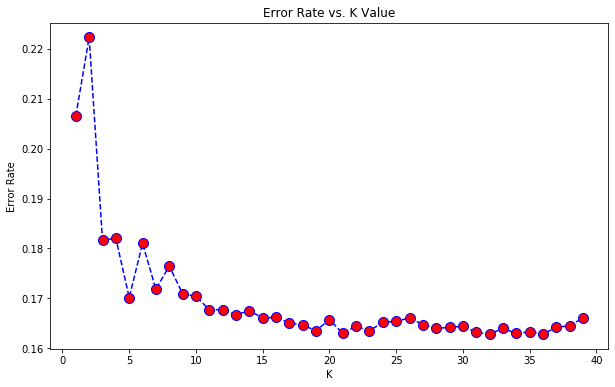

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
# Use elbow method, choose the k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1442  864]
 [ 676 6067]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      2306
           1       0.88      0.90      0.89      6743

    accuracy                           0.83      9049
   macro avg       0.78      0.76      0.77      9049
weighted avg       0.83      0.83      0.83      9049



##2.4 K Means Clustering





###2.4.1 Fit an Extra Trees model to identify the Importance of each feature



In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
dataset = df_replace_le._get_values

In [0]:
dataset_train = dataset[:,0:-1]
dataset_label = dataset[:,-1]

In [0]:
model = ExtraTreesClassifier()

In [43]:
model.fit(dataset_train,dataset_label)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [44]:
print(model.feature_importances_)

[0.14892523 0.04448566 0.15830807 0.02951303 0.07739146 0.10191755
 0.07983065 0.07339363 0.01554255 0.01812666 0.11162172 0.03223317
 0.0921116  0.01659903]


In [0]:
testing_data = df_replace_prediction._get_values

In [46]:
model = ExtraTreesClassifier()
model.fit(dataset_train,dataset_label)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [47]:
print(model.feature_importances_)

[0.14803069 0.04312269 0.15967349 0.02664329 0.08703823 0.07656128
 0.07834227 0.07892902 0.01427956 0.03006016 0.12090986 0.03045293
 0.08946761 0.0164889 ]


In [48]:
d=print(model.feature_importances_)

[0.14803069 0.04312269 0.15967349 0.02664329 0.08703823 0.07656128
 0.07834227 0.07892902 0.01427956 0.03006016 0.12090986 0.03045293
 0.08946761 0.0164889 ]


In [49]:
d = {0: [model.feature_importances_[0]], 1: [model.feature_importances_[1]], 2:[model.feature_importances_[2]], 3: [model.feature_importances_[3]],4:[model.feature_importances_[4]]
    ,5:[model.feature_importances_[5]],6:[model.feature_importances_[6]],7:[model.feature_importances_[7]]
    ,8:[model.feature_importances_[8]],9:[model.feature_importances_[9]],10:[model.feature_importances_[10]]
    ,11:[model.feature_importances_[11]],12:[model.feature_importances_[12]],13:[model.feature_importances_[13]]}
abe = pd.DataFrame(data=d)
abe


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.148031,0.043123,0.159673,0.026643,0.087038,0.076561,0.078342,0.078929,0.01428,0.03006,0.12091,0.030453,0.089468,0.016489


In [50]:
model.feature_importances_[1]

0.04312268596002781

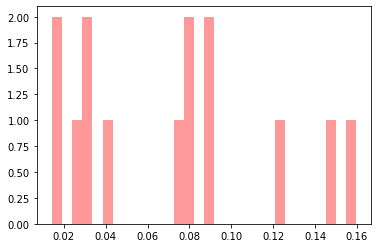

In [51]:
sb.distplot(abe,kde=False,bins=30,color='red')

In [0]:
from sklearn import feature_selection

In [0]:
output1=model.feature_importances_

In [0]:
output2=feature_selection.mutual_info_classif(dataset_train,dataset_label)

In [0]:
output3=output1+output2

In [0]:
n=10
important_features=np.argsort(output3)[::-1][:n]

In [0]:
training_data=dataset_train[:,important_features]
training_label=dataset_label

In [0]:
testing_data=testing_data[:,important_features]

###2.4.2 Modelling

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters = 2)

In [61]:
kmeans.fit(df_replace_le)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
kmeans.cluster_centers_

array([[2.02978086e+01, 2.11174629e+00, 1.48154475e+04, 5.39818974e+00,
        9.02858310e+00, 1.04042466e+00, 6.57411188e+00, 1.53749830e+00,
        2.02123316e-01, 3.14822376e-01, 6.36212059e+00, 1.93786580e+00,
        3.96259017e+01, 2.46522390e+00, 7.58064516e-01],
       [2.25162270e+01, 2.10705974e+00, 5.08470041e+03, 5.36307215e+00,
        9.20940005e+00, 1.10796483e+00, 6.54480217e+00, 1.51111973e+00,
        2.21036980e-01, 3.33333333e-01, 6.73325575e+00, 2.20067236e+00,
        4.01048616e+01, 1.34212568e+00, 7.44440134e-01]])

###2.4.3 Evaluation

In [0]:
df_replace_le['Cluster'] = df_replace_le['14'].apply(lambda x: 0 if '14' == 0 else 1)

In [67]:
df_replace_le.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Cluster
0,22,0,2491,0,12,0,0,0,0,0,24,0,39,0,1,1
1,33,1,2727,0,12,1,1,1,0,0,0,0,12,0,1,1
2,21,2,13188,1,8,2,6,0,0,0,0,0,39,0,1,1
3,36,2,14354,8,6,1,6,1,1,0,0,0,39,0,1,1
4,11,2,18120,0,12,1,7,2,1,1,0,0,39,1,1,1


In [68]:
print(confusion_matrix(df_replace_le['Cluster'], kmeans.labels_))
print(classification_report(df_replace_le['Cluster'], kmeans.labels_))

[[    0     0]
 [14687 15475]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.68     30162

    accuracy                           0.51     30162
   macro avg       0.50      0.26      0.34     30162
weighted avg       1.00      0.51      0.68     30162



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


##2.5 SVM

###2.5.1 Modelling


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split


In [0]:
df_replace_le =df_replace_le.dropna()
X = df_replace_le.drop('14',axis=1)
y = df_replace_le['14']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [0]:
clf = svm.SVC()

In [73]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = clf.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.00      0.01      2306
           1       0.75      1.00      0.85      6743

    accuracy                           0.74      9049
   macro avg       0.59      0.50      0.43      9049
weighted avg       0.67      0.74      0.64      9049

[[   7 2299]
 [   9 6734]]


In [0]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [0]:
classifier = SVC()

In [0]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [79]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.754, total=  25.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.754, total=  24.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.754, total=  24.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.754, total=  25.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.754, total=  25.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.754, total=  25.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.754, total=  19.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.754, total=  19.9s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.754, total=  19.9s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 19.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [80]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [0]:
grid_predictions = grid.predict(X_test)

In [83]:
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.20      0.32      2306
           1       0.78      0.98      0.87      6743

    accuracy                           0.78      9049
   macro avg       0.76      0.59      0.59      9049
weighted avg       0.77      0.78      0.73      9049

[[ 468 1838]
 [ 158 6585]]


## 2.6 TF-Classification & DNN

### 2.6.1 Normalization and Feature Columns

In [84]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [85]:
df_replace_le.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Cluster
0,22,0,2491,0,12,0,0,0,0,0,24,0,39,0,1,1
1,33,1,2727,0,12,1,1,1,0,0,0,0,12,0,1,1
2,21,2,13188,1,8,2,6,0,0,0,0,0,39,0,1,1
3,36,2,14354,8,6,1,6,1,1,0,0,0,39,0,1,1
4,11,2,18120,0,12,1,7,2,1,1,0,0,39,1,1,1


In [86]:
df_replace_le.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', 'Cluster'],
      dtype='object')

In [0]:
cols_to_norm = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13']

In [0]:
df_replace_le[cols_to_norm] = df_replace_le[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [0]:
A = tf.feature_column.numeric_column('0')
B = tf.feature_column.numeric_column('1')
C = tf.feature_column.numeric_column('2')
D = tf.feature_column.numeric_column('3')
E = tf.feature_column.numeric_column('4')
F = tf.feature_column.numeric_column('5')
G = tf.feature_column.numeric_column('6')
H = tf.feature_column.numeric_column('7')
I = tf.feature_column.numeric_column('8')
J = tf.feature_column.numeric_column('9')
K = tf.feature_column.numeric_column('10')
L = tf.feature_column.numeric_column('11')
M = tf.feature_column.numeric_column('12')
N = tf.feature_column.numeric_column('13')

In [0]:
feat_cols = [A,B,C,D,E,F,G,H,I,J,K,L,M,N]

### 2.6.2 Modeling

In [0]:
X = df_replace_le.drop('14',axis=1)
y = df_replace_le['14']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=None,shuffle=True)

In [96]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpldpmeuyf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0585bc1860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [97]:
model.train(input_fn=input_func,steps=5000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpldpmeuyf/mo

### 2.6.3 Evaluation

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [99]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-12T22:04:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpldpmeuyf/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-12-22:04:44
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.80605054, accuracy_baseline = 0.74828017, auc = 0.825727, auc_precision_recall = 0.9277233, average_loss = 0.42039278, global_step = 5000, label/mean = 0.74828017, loss = 4.2021866, precision = 0.82079816, prediction/mean = 0.74307233, recall = 0.9477182
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpldpmeuyf/model.ckpt-5000


In [100]:
results

{'accuracy': 0.80605054,
 'accuracy_baseline': 0.74828017,
 'auc': 0.825727,
 'auc_precision_recall': 0.9277233,
 'average_loss': 0.42039278,
 'global_step': 5000,
 'label/mean': 0.74828017,
 'loss': 4.2021866,
 'precision': 0.82079816,
 'prediction/mean': 0.74307233,
 'recall': 0.9477182}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)

### 2.6.4 DNN Classifier


In [103]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi97v71_g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0585bc13c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [104]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpi97v71_g/model.ckpt.
INFO:tensorflow:loss = 7.6832743, step = 0
INFO:tensorflow:global_step/sec: 249.1
INFO:tensorflow:loss = 4.3502626, step = 100 (0.403 sec)
INFO:tensorflow:global_step/sec: 325.751
INFO:tensorflow:loss = 6.4094553, step = 200 (0.307 sec)
INFO:tensorflow:global_step/sec: 341.05
INFO:tensorflow:loss = 3.048503, step = 300 (0.293 sec)
INFO:tensorflow:global_step/sec: 335.898
INFO:tensorflow:loss = 2.3793557, step = 400 (0.298 sec)
INFO:tensorflow:global_step/sec: 320.277
INFO:tensorflow:loss = 2.597722, step = 500 (0.312 sec)
INFO:tensorflow:global_step/sec: 343.951
I

### 2.6.5 Evaluation

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [106]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-12T22:05:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi97v71_g/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-12-22:05:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.82370496, accuracy_baseline = 0.74828017, auc = 0.8698382, auc_precision_recall = 0.9497107, average_loss = 0.38251767, global_step = 1000, label/mean = 0.74828017, loss = 3.8235922, precision = 0.8309832, prediction/mean = 0.783911, recall = 0.9595702
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpi97v71_g/model.ckpt-1000


{'accuracy': 0.82370496,
 'accuracy_baseline': 0.74828017,
 'auc': 0.8698382,
 'auc_precision_recall': 0.9497107,
 'average_loss': 0.38251767,
 'global_step': 1000,
 'label/mean': 0.74828017,
 'loss': 3.8235922,
 'precision': 0.8309832,
 'prediction/mean': 0.783911,
 'recall': 0.9595702}